# Kaggle: NLP-based Sentiment Analysis for Data from Twitter and Reddit
**Tweets and Comments extracted from Twitter and Reddit For Sentimental Analysis**     
https://www.kaggle.com/cosmos98/twitter-and-reddit-sentimental-analysis-dataset?select=Twitter_Data.csv

The 3 approaches used follow the timeline of when methods were created:         
1. Count-based methods like CountVectorizer and TFIDF Vectorizer
2. Long short-term memory (LSTM) using word embeddings - recurrent neural network (RNN) architecture
3. Transformer-based method using the library Hugginface
- Compared results and defined use cases respectively at the end

## Data Preprocessing: train, validation, test

In [58]:
import pandas as pd

twitter_df = pd.read_csv('/Users/mucongl/Downloads/data/UCLA_ML/hw4_NLP_text/Twitter_Data_Sample.csv').dropna()
reddit_df = pd.read_csv('/Users/mucongl/Downloads/data/UCLA_ML/hw4_NLP_text/Reddit_Data.csv').dropna()

X_twitter = twitter_df['clean_text']
y_twitter = twitter_df['category'] + 1 

# Sum 1 so the categories are not negative
# Now Negative is 0, Neutral is 1 and Positive is 2

X_reddit = reddit_df['clean_comment']
y_reddit = reddit_df['category'] + 1


In [59]:
X_train_tweet, y_train_tweet, X_test_tweet, y_test_tweet, X_val_tweet, y_val_tweet = get_train_val_test(X_twitter, y_twitter, split=0.2)

In [60]:
X_train_reddit, y_train_reddit, X_test_reddit, y_test_reddit, X_val_reddit, y_val_reddit = get_train_val_test(X_reddit, y_reddit, split=0.2)

## Approach 1: using count-based methods to represent text documents.

- The 1st one will be using [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) 
- The 2nd one will be using the [TF-IDF Vectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer)

In [77]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

tfidf_vectorizer = TfidfVectorizer()
count_vectorizer = CountVectorizer()

### Twitter - model 1: TFIDF

In [78]:
tfidf_vectorizer.fit(X_train_tweet)

X_train_tweet_tfidf = tfidf_vectorizer.transform(X_train_tweet)
X_test_tweet_tfidf  = tfidf_vectorizer.transform(X_test_tweet)
X_val_tweet_tfidf   = tfidf_vectorizer.transform(X_val_tweet)

In [79]:
X_train_tweet_tfidf.shape

(34125, 41045)

In [87]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty='l1', solver='saga')

clf.fit(X_train_tweet_tfidf, y_train_tweet)

y_pred = clf.predict(X_val_tweet_tfidf)
print(classification_report(y_val_tweet, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88       961
           1       0.91      0.99      0.95      1480
           2       0.94      0.92      0.93      1825

    accuracy                           0.93      4266
   macro avg       0.93      0.92      0.92      4266
weighted avg       0.93      0.93      0.93      4266



/Users/mucongl/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [88]:
y_pred = clf.predict(X_test_tweet_count)
print(classification_report(y_test_tweet, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80       968
           1       0.81      0.91      0.86      1490
           2       0.90      0.85      0.87      1808

    accuracy                           0.85      4266
   macro avg       0.85      0.84      0.84      4266
weighted avg       0.85      0.85      0.85      4266



### Twitter - model 2: CountVectorizer

In [81]:
count_vectorizer.fit(X_train_tweet)

X_train_tweet_conunt = count_vectorizer.transform(X_train_tweet)
X_test_tweet_count   = count_vectorizer.transform(X_test_tweet)
X_val_tweet_count    = count_vectorizer.transform(X_val_tweet)

In [82]:
X_train_tweet_conunt.shape

(34125, 41045)

In [83]:
clf = LogisticRegression(penalty='l1', solver='saga')

clf.fit(X_train_tweet_conunt, y_train_tweet)

y_pred = clf.predict(X_val_tweet_count)
print(classification_report(y_val_tweet, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87       961
           1       0.91      0.98      0.95      1480
           2       0.94      0.92      0.93      1825

    accuracy                           0.92      4266
   macro avg       0.92      0.91      0.92      4266
weighted avg       0.92      0.92      0.92      4266



/Users/mucongl/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [86]:
y_pred = clf.predict(X_test_tweet_count)
print(classification_report(y_test_tweet, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88       968
           1       0.93      0.97      0.95      1490
           2       0.93      0.93      0.93      1808

    accuracy                           0.93      4266
   macro avg       0.92      0.92      0.92      4266
weighted avg       0.92      0.93      0.92      4266



### Reddit - model 1: TFIDF

In [84]:
tfidf_vectorizer.fit(X_train_reddit)

X_train_reddit_tfidf = tfidf_vectorizer.transform(X_train_reddit)
X_test_reddit_tfidf  = tfidf_vectorizer.transform(X_test_reddit)
X_val_reddit_tfidf   = tfidf_vectorizer.transform(X_val_reddit)

In [85]:
X_train_reddit_tfidf.shape

(29719, 46770)

In [90]:
clf = LogisticRegression(penalty='l1', solver='saga')

clf.fit(X_train_reddit_tfidf, y_train_reddit)

y_pred = clf.predict(X_val_reddit_tfidf)
print(classification_report(y_val_reddit, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86       806
           1       0.92      0.98      0.95      1321
           2       0.93      0.92      0.92      1588

    accuracy                           0.92      3715
   macro avg       0.92      0.91      0.91      3715
weighted avg       0.92      0.92      0.92      3715



/Users/mucongl/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [91]:
y_pred = clf.predict(X_test_reddit_tfidf)
print(classification_report(y_test_reddit, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.80      0.85       791
           1       0.91      0.99      0.94      1333
           2       0.94      0.93      0.93      1591

    accuracy                           0.92      3715
   macro avg       0.92      0.90      0.91      3715
weighted avg       0.92      0.92      0.92      3715



### Reddit - model 2: CountVectorizer

In [92]:
count_vectorizer.fit(X_train_reddit)

X_train_reddit_conunt = count_vectorizer.transform(X_train_reddit)
X_test_reddit_count   = count_vectorizer.transform(X_test_reddit)
X_val_reddit_count    = count_vectorizer.transform(X_val_reddit)

print(X_train_reddit_conunt.shape)

clf = LogisticRegression(penalty='l1', solver='saga')

clf.fit(X_train_reddit_conunt, y_train_reddit)

y_pred = clf.predict(X_val_reddit_count)
print(classification_report(y_val_reddit, y_pred))

y_pred = clf.predict(X_test_reddit_count)
print(classification_report(y_test_reddit, y_pred))

(29719, 46770)
              precision    recall  f1-score   support

           0       0.79      0.61      0.69       806
           1       0.79      0.92      0.85      1321
           2       0.84      0.82      0.83      1588

    accuracy                           0.81      3715
   macro avg       0.81      0.78      0.79      3715
weighted avg       0.81      0.81      0.81      3715

              precision    recall  f1-score   support

           0       0.80      0.58      0.67       791
           1       0.78      0.94      0.85      1333
           2       0.85      0.82      0.84      1591

    accuracy                           0.81      3715
   macro avg       0.81      0.78      0.79      3715
weighted avg       0.81      0.81      0.81      3715



/Users/mucongl/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


### Conclusion - Approach 1:
**Difference between the two models? Which one is better and why?**
- The CountVectorizer converts the text documents to a matrix of token counts, which record the number of time that certain word appears
- The TfidfVectorizer converts the text documents to a matrix of TF-IDF features, which record the number of time that certain word appears, but normalized by total times that it appears in the document, and this makes word such as ‘the’, ‘a’, ‘and’ less important for the model
- For Reddit, TFIDF is better
- For Twitter, Count is better
- This is actually NOT what I expected as I thought TFIDF would be better in all scenarios. 
- After thinking about it, I think this happens because:
- On Twitter, many people post similar contents on the same topic. If a certain topic has a strong emotion and sentiment associated with it, more people are going to discuss it. Thus, the count of appearance of words can be a strong indicator or the sentiment.
- On the other hand, Reddit is a forum. People are more likely to discuss certain issue under one post/thread. If someone has said something, other people are not very likely to repeat similar thing. TFIDF can effectively eliminate the common words and emphasize the valuable words, and it is more effective here.

## Approach 2: LSTM Model on Reddit data (Deep Learning)

#### 1st step: Compute the Vocabulary size for the reddit dataset.

In [93]:
reddit_vocabulary_size = len(set([tok for s in X_train_reddit.values.tolist() for tok in s.split()]))

print(f"Reddit's Vocabulary size is {reddit_vocabulary_size}")

Reddit's Vocabulary size is 48143


#### 2nd step: preprocess
- To use it on Keras, first need to change the words to numeric values. 
- Also need to make all the sentences to be the same size for the matrix computations. To do that, I select a length to the text:
    - If the text is shorter than the length, pad it with zeros until it is has the correct size. The model will learn that zeros mean padding and will ignore it. 
    - If the text is longer than the length, just discard the extra words.

In [94]:
from keras.preprocessing.text import one_hot
from keras.preprocessing import sequence

OOV_BUCKETS = 10
TEXT_LENGTH = 100

# Creates sequences for twitter_data and reddit_data
def converts_text_to_padded_sequences(X, vocabulary_size, oov=OOV_BUCKETS, max_review_length=TEXT_LENGTH):
    number_sequences =  [one_hot(sentence, vocabulary_size + oov ) for sentence in X.values.tolist()]
    padded_sequences = sequence.pad_sequences(number_sequences, maxlen=max_review_length)

    return padded_sequences

reddit_train_dl = converts_text_to_padded_sequences(X_train_reddit, reddit_vocabulary_size)
reddit_test_dl = converts_text_to_padded_sequences(X_test_reddit, reddit_vocabulary_size)
reddit_val_dl = converts_text_to_padded_sequences(X_val_reddit, reddit_vocabulary_size)

# Train, validation and test splits preprocessed for the Reddit data

#### 3rd step: modeling
- The code below will train a one layer LSTM on the Reddit data. 
- It will create n embeddings, being n the vocabulary size. 
- It means that each word will have their own embedding and the model will learn how to represent the words as it learns to perfom the task.

#### To improve modeling result (done in 2nd and 3rd try below)
- dropout
- batch normalization
- changing the activation functions.
- More complex:
    - different optmizers 
    - learning rate schedulers 
    
- Embedding size and batch size

In [95]:
import numpy
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
numpy.random.seed(7)

# load the dataset but only keep the top n words, zero the rest
my_callbacks = [
    keras.callbacks.EarlyStopping(patience=10),
    keras.callbacks.ModelCheckpoint(filepath="best_weights_reddit.hdf5", verbose=1, save_best_only=True),
]


def train_model(X_train, y_train, X_val, y_val, embedding_size, vocabulary_size, text_length, epochs, batch_size):
    # TODO:
    # edit this part of the code to change the parameters to improve the results.
    # methods: see above markdown cell
    
    model = Sequential()
    model.add(Embedding(vocabulary_size, embedding_size, input_length=text_length)) 
    # Create embeddings for each word in our vocabulary
    model.add(LSTM(100)) 
    # One layer of LSTM with 100 hidden units
    model.add(Dense(3, activation='softmax')) 
    # Output softmax for the 3 classes, Negative, Neutral and Positive
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), callbacks=my_callbacks)
    

    return model, history
  
# Train the model by passing the reddit data and parameters related to reddit.
# TODO: edit embedding size and batch size to increase accuracy
reddit_model, reddit_history = train_model(reddit_train_dl, y_train_reddit, reddit_val_dl, y_val_reddit, 
                             embedding_size=30, vocabulary_size=reddit_vocabulary_size+OOV_BUCKETS, 
                             text_length= TEXT_LENGTH, epochs=20, batch_size=1024)



reddit_model.load_weights('best_weights_reddit.hdf5')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 30)           1444590   
_________________________________________________________________
lstm (LSTM)                  (None, 100)               52400     
_________________________________________________________________
dense (Dense)                (None, 3)                 303       
Total params: 1,497,293
Trainable params: 1,497,293
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
30/30 [==============================] - 10s 303ms/step - loss: 1.0537 - accuracy: 0.4803 - val_loss: 0.9123 - val_accuracy: 0.5750

Epoch 00001: val_loss improved from inf to 0.91226, saving model to best_weights_reddit.hdf5
Epoch 2/20
30/30 [==============================] - 9s 289ms/step - loss: 0.8910 - accuracy: 0.5829 - val_loss: 0.8565 - val_accuracy:

In [96]:
import matplotlib.pyplot as plt

def plot_history(history):
    pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
    plt.grid(True)
    plt.show()

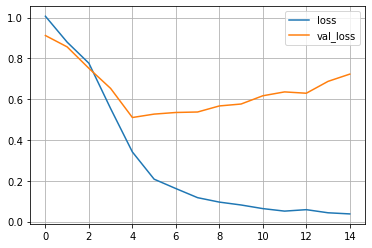

In [97]:
plot_history(reddit_history)

In [98]:
import tensorflow as tf
from sklearn.metrics import classification_report
def transform_model_output_to_prediction(output):
  probabilities = tf.nn.softmax(output, axis=1).numpy()
  predictions = np.argmax(probabilities, axis=1)
  return predictions



In [99]:
y_pred = transform_model_output_to_prediction(reddit_model.predict(reddit_test_dl))
print(classification_report(y_test_reddit, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.67      0.71       791
           1       0.87      0.89      0.88      1333
           2       0.84      0.87      0.86      1591

    accuracy                           0.84      3715
   macro avg       0.82      0.81      0.82      3715
weighted avg       0.83      0.84      0.83      3715



#### 2nd try - Increased the embedding size
- The first thing that I notice when the embedding size is increased was that the model ran slower.
- Then the result metrics (on test data) get better result. 
- The embedding size is the output dimension of the Keras Embedding Layer, which is the size of the vector space in which words will be embedded. It defines the size of the output vectors from this layer for each word.
- The embedding dimensions will determine how much you will compress / intentionally bottleneck the lexical information; larger dimensionality will allow your model to distinguish more lexical detail which is good if and only if your supervised data has enough information to use that lexical detail properly, but if it's not there, then the extra lexical information will overfit and a smaller embedding dimensionality will generalize better.

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 300)          14445900  
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 303       
Total params: 14,606,603
Trainable params: 14,606,603
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
30/30 [==============================] - 23s 738ms/step - loss: 1.0088 - accuracy: 0.5276 - val_loss: 0.8432 - val_accuracy: 0.6035

Epoch 00001: val_loss did not improve from 0.48769
Epoch 2/20
30/30 [==============================] - 24s 793ms/step - loss: 0.7572 - accuracy: 0.6620 - val_loss: 0.6586 - val_accuracy: 0.7553

Epoch 00002: val_loss did no

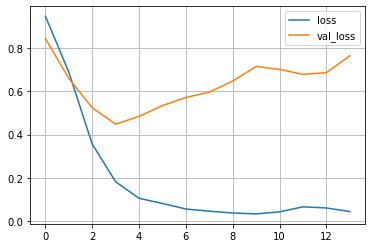

In [102]:
# fix random seed for reproducibility
numpy.random.seed(7)

# Increased embedding_size from 30 to 300
reddit_model, reddit_history = train_model(reddit_train_dl, y_train_reddit, reddit_val_dl, y_val_reddit, 
                             embedding_size=300, vocabulary_size=reddit_vocabulary_size+OOV_BUCKETS, 
                             text_length= TEXT_LENGTH, epochs=20, batch_size=1024) 


reddit_model.load_weights('best_weights_reddit.hdf5')

plot_history(reddit_history)

In [103]:
y_pred = transform_model_output_to_prediction(reddit_model.predict(reddit_test_dl))
print(classification_report(y_test_reddit, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.74      0.75       791
           1       0.91      0.91      0.91      1333
           2       0.88      0.89      0.89      1591

    accuracy                           0.87      3715
   macro avg       0.85      0.85      0.85      3715
weighted avg       0.87      0.87      0.87      3715



#### 3rd try - with dropout, batch normalization, and changing the activation functions.

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 100, 30)           1444590   
_________________________________________________________________
lstm_8 (LSTM)                (None, 100)               52400     
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 303       
_________________________________________________________________
dropout_3 (Dropout)          (None, 3)                 0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 3)                 12        
Total params: 1,497,305
Trainable params: 1,497,299
Non-trainable params: 6
_________________________________________________________________
None
Epoch 1/20
30/30 [==============================] - 13s 391ms/step - loss: 1.9822 - accuracy: 0.3426 - va

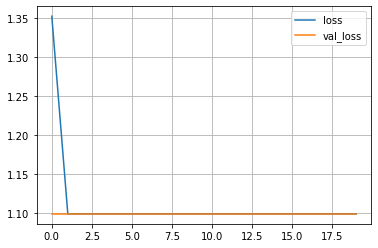

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       791
           1       0.36      1.00      0.53      1333
           2       0.00      0.00      0.00      1591

    accuracy                           0.36      3715
   macro avg       0.12      0.33      0.18      3715
weighted avg       0.13      0.36      0.19      3715



/Users/mucongl/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [110]:
from keras.layers import *

my_callbacks = [
    keras.callbacks.EarlyStopping(patience=10),
    keras.callbacks.ModelCheckpoint(filepath="best_weights_reddit.hdf5", verbose=1, save_best_only=True),
]

# fix random seed for reproducibility
numpy.random.seed(7)

def train_model_extra(X_train, y_train, X_val, y_val, embedding_size, vocabulary_size, text_length, epochs, batch_size):
    # edit this part of the code to change the parameters to improve the results.
    model = Sequential()
    model.add(Embedding(vocabulary_size, embedding_size, input_length=text_length)) 
    # We create embeddings for each word in our vocabulary
    model.add(LSTM(100)) # one layer of LSTM with 100 hidden units
    model.add(Dense(3, activation='relu')) # Output softmax for the 3 classes, Negative, Neutral and Positive
    model.add(Dropout(0.25))
    model.add(BatchNormalization())
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))
    
    return model, history

# edit embedding size and batch size to increase accuracy
reddit_model, reddit_history = train_model_extra(reddit_train_dl, y_train_reddit, reddit_val_dl, y_val_reddit, 
                             embedding_size=30, vocabulary_size=reddit_vocabulary_size+OOV_BUCKETS, 
                             text_length= TEXT_LENGTH, epochs=20, batch_size=1024)


# reddit_model.load_weights('best_weights_reddit.hdf5')

plot_history(reddit_history)

y_pred = transform_model_output_to_prediction(reddit_model.predict(reddit_test_dl))
print(classification_report(y_test_reddit, y_pred))

## Approach 3: Train a transformer-based model on Twitter data and compare to a pre-trained model

#### First, check from existing trained models 
- To see what I can get without training my own model. 
- Use the [pipelines from the Hugginface Library](https://huggingface.co/transformers/main_classes/pipelines.html).
- Found a model pretrained on Yelp because the default model only had 2 classes, Positive or Negative.
- My task has 3 classes, Positive, Neutral and Negative.

In [111]:
from transformers import pipeline
# Yelp sentiment
model_name="gilf/english-yelp-sentiment"
sentiment_pipeline = pipeline('sentiment-analysis',model=model_name, tokenizer=model_name)

Some layers from the model checkpoint at gilf/english-yelp-sentiment were not used when initializing TFBertModel: ['classifier', 'dropout_37']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at gilf/english-yelp-sentiment.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Some layers from the model checkpoint at gilf/english-yelp-sentiment were not used when initializing TFBertForSequenceClassification: ['dropout_37']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at gilf/english-yelp-sentiment and are newly initialized: ['dropout_78']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [112]:
# Convert the 5 classes from Yelp (1-5 stars) into negative (1,2), neutral(3), and positive (4,5)

def convert_prediction_to_number(pred):
  preds = {"LABEL_0": 0,
      "LABEL_1" : 0,
      "LABEL_2" : 1,
      "LABEL_3" : 2,
      "LABEL_4" : 2
  }
  return preds[pred]


y_pred = [ convert_prediction_to_number(p['label']) for p in sentiment_pipeline(list(X_test_tweet.values))]

print(classification_report(list(y_test_tweet.values), y_pred))


              precision    recall  f1-score   support

           0       0.28      0.88      0.43       968
           1       0.56      0.21      0.30      1490
           2       0.62      0.23      0.34      1808

    accuracy                           0.37      4266
   macro avg       0.49      0.44      0.36      4266
weighted avg       0.52      0.37      0.35      4266



#### 2nd: fine-tune one of the large models to perform the task on Twitter data.
- Now I know how good a out-of-the-box algorithm can do (baseline)
- Note that it has been trained on a large amount of data

Steps taken:
- Specify the optimizer to Adam and learning rate to 5e-5
- Specify the batch size to 16
- Specify the epochs to 2 


Result:
- The fine-tuned method perform much better with an accuracy of 0.95

In [113]:
from transformers import DistilBertTokenizer, RobertaTokenizer
import tensorflow as tf
from tqdm import tqdm

# Import the distilbert model, which is a smaller version of the powerful models
# Can use the roberta model uncomment the commented steps to use the roberta tokenizer
# But it is very slow and uses a lot of memory. 

distil_bert = 'distilbert-base-uncased' # Pick any desired pre-trained model
roberta = 'roberta-base'

# Defining DistilBERT tokonizer
tokenizer = DistilBertTokenizer.from_pretrained(distil_bert, do_lower_case=True, add_special_tokens=True,
                                                max_length=100, pad_to_max_length=True)
# # Defining RoBERTa tokinizer
# tokenizer = RobertaTokenizer.from_pretrained(roberta, do_lower_case=True, add_special_tokens=True,
#                                                 max_length=128, pad_to_max_length=True)


In [114]:
# Use the tokenizers to transform the raw text into the tokens needed by the model

train_encodings = tokenizer(list(X_train_tweet.values),
                            truncation=True,
                            padding=True)
val_encodings = tokenizer(list(X_val_tweet.values),
                            truncation=True,
                            padding=True)


In [115]:
# Tensorflow uses datasets to read the tensor data in batches

train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    list(y_train_tweet.values)
))
val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings),
    list(y_val_tweet.values)
))



In [118]:
from transformers import TFDistilBertForSequenceClassification, DistilBertConfig
import tensorflow as tf

# Change this if to use roberta
distil_bert = 'distilbert-base-uncased'

# Initialize a pre-trained model with the configuration for predicting 3classes
config = DistilBertConfig(num_labels=3)
model = TFDistilBertForSequenceClassification.from_pretrained(distil_bert, config=config)

my_callbacks = [
    keras.callbacks.ModelCheckpoint(filepath="best_weights_twitter.hdf5", verbose=1, save_best_only=True),
]

# Initialized with the parameters from the pretrained model
# Can increase the number of epochs to improve
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
model.compile(optimizer=optimizer, loss=model.compute_loss, metrics=['accuracy'])
batch_size = 16
tweet_history = model.fit(train_dataset.shuffle(100).batch(batch_size),
          epochs=2,
          batch_size=batch_size,
          validation_data=val_dataset.batch(batch_size),
          callbacks=my_callbacks)


Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_projector', 'activation_13', 'vocab_layer_norm', 'vocab_transform']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier', 'dropout_118', 'pre_classifier']
You should probably TRAIN this model on a down-stream task to be able to use 

Epoch 1/2
2133/2133 [==============================] - 3228s 2s/step - loss: 0.5176 - accuracy: 0.7914 - val_loss: 0.1675 - val_accuracy: 0.9444

Epoch 00001: val_loss improved from inf to 0.16751, saving model to best_weights_twitter.hdf5
Epoch 2/2
2133/2133 [==============================] - 3222s 2s/step - loss: 0.1548 - accuracy: 0.9520 - val_loss: 0.1573 - val_accuracy: 0.9548

Epoch 00002: val_loss improved from 0.16751 to 0.15729, saving model to best_weights_twitter.hdf5


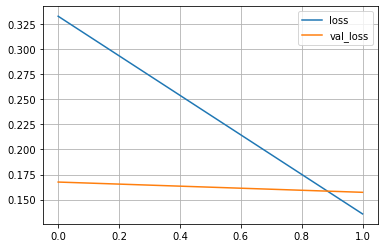

In [119]:
plot_history(tweet_history)

#### 3rd: make the prediction on the test data and print the classification report.

In [123]:
model.load_weights('best_weights_twitter.hdf5')
predict_input = dict(tokenizer(list(X_test_tweet.values),
                                 truncation=True,
                                 padding=True,
                                 return_tensors="tf"))['input_ids']

In [124]:
tf_output = model.predict(predict_input)

tf_prediction = tf.nn.softmax(tf_output[0], axis=1).numpy()


In [125]:
y_pred = transform_model_output_to_prediction(model.predict(predict_input)[0])

print(classification_report(list(y_test_tweet.values),y_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       968
           1       0.99      0.96      0.97      1490
           2       0.95      0.96      0.96      1808

    accuracy                           0.95      4266
   macro avg       0.95      0.95      0.95      4266
weighted avg       0.95      0.95      0.95      4266



## Conclusion: 
### Which situations to use, the count-based, the LSTM, the out-of-the-box, and the fine-tuned model?
- **Count-based**: for situation where the count of appearance of words can be a strong indicator of sentiment. For example, on Twitter, many people post similar contents on the same topic. If a certain topic has a strong emotion and sentiment associated with it, more people are going to discuss it. Thus, the count of appearance of words can be a strong indicator or the sentiment.
- **LSTM**: the typical use cases for LSTM are music generation, text generation, and stock prediction
- **Out-of-the-box**: when the application of the analysis is similar to the one that is used to train the pre-trained model
- **Fine-tuned**: when the out-of-the-box model gets a decent baseline score, and the analytical situation is similar so that fine-tuning would result in a great increase of performance